In [2]:
# https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [4]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
img_path='./Day 14 Students files/German Traffic Sign/Train/'
labels = [item for item in os.listdir(img_path) if os.path.isdir(os.path.join(img_path, item))]

In [14]:
def set_df(dir):
    img_list=[]
    label_list=[]
    for label in labels:
        i=0
        for img_file in os.listdir(dir+label):
            i+=1
            img_list.append(dir+label+'/'+img_file)
            label_list.append(label)
    df=pd.DataFrame({"img":img_list, "label":label_list})
    return df

In [15]:
df=set_df(img_path)

In [16]:
df.sample(10)

,img,label
6944,./Day 14 Students files/German Traffic Sign/Tr...,11
26454,./Day 14 Students files/German Traffic Sign/Tr...,3
32755,./Day 14 Students files/German Traffic Sign/Tr...,13
17245,./Day 14 Students files/German Traffic Sign/Tr...,8
6620,./Day 14 Students files/German Traffic Sign/Tr...,11
19956,./Day 14 Students files/German Traffic Sign/Tr...,38
5652,./Day 14 Students files/German Traffic Sign/Tr...,9
18446,./Day 14 Students files/German Traffic Sign/Tr...,21
18376,./Day 14 Students files/German Traffic Sign/Tr...,21
3692,./Day 14 Students files/German Traffic Sign/Tr...,18


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     39209 non-null  object
 1   label   39209 non-null  object
dtypes: object(2)
memory usage: 612.8+ KB


In [18]:
image=cv2.imread(str(df['img'][0]))
image.shape

(64, 60, 3)

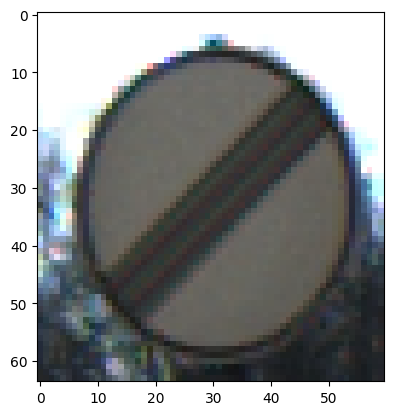

In [19]:
plt.imshow(image)

In [20]:
size=32
x=[]

for imge in df["img"]:
    img=cv2.imread(str(imge))
    #print(imge, img. shape)
    img=cv2.resize(img, (size,size)) # cv2. INTER_LINEAR
    img=img/255.0
    x.append(img)

In [21]:
x=np.array(x)

In [22]:
y=df['label'].astype(int)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=42)

In [24]:
# Modelling

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [27]:
model=Sequential()

model.add(Input(shape=(size, size,3)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu' ))
model.add(Conv2D(32, kernel_size= (3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu' ))
model.add(Conv2D (128, kernel_size= (3,3) ,activation='relu'))
model.add (MaxPooling2D (pool_size= (2,2)))
model.add(BatchNormalization ())

model.add(Flatten() )
model.add(Dense (512, activation='relu' ))
model.add(BatchNormalization())
model.add(Dropout(rate=.5))
model.add(Dense(43, activation='softmax' ))

#categorical crossentropy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy' ])

In [28]:
history=model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=30,
    verbose=1
)

Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 85s 84ms/step - accuracy: 0.7782 - loss: 0.9182 - val_accuracy: 0.9907 - val_loss: 0.0358
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.9899 - loss: 0.0355 - val_accuracy: 0.9841 - val_loss: 0.0569
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.9908 - loss: 0.0309 - val_accuracy: 0.9902 - val_loss: 0.0348
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.9952 - loss: 0.0177 - val_accuracy: 0.9968 - val_loss: 0.0154
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 76s 77ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9820 - val_loss: 0.0605
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.9934 - loss: 0.0216 - val_accuracy: 0.9856 - val_loss: 0.0531
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 76s 77ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9927 - val_loss: 0.0284
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.9954 - loss: 0.0155 - 

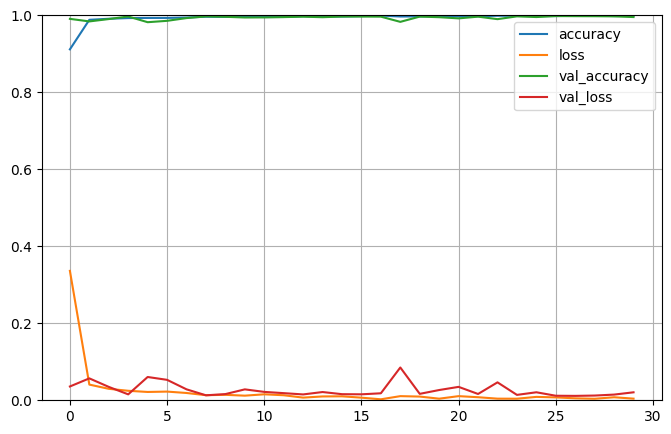

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
loss, accuracy = model.evaluate(x_test, y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9952 - loss: 0.0182


In [31]:
accuracy

0.9954093098640442

In [32]:
pred = model.predict(x_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


In [33]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [34]:
confusion_matrix(y_test, np.argmax(pred, axis=1))

array([[ 47,   0,   0, ...,   0,   0,   0],
       [  0, 430,   0, ...,   0,   0,   0],
       [  0,   0, 445, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  75,   0,   0],
       [  0,   0,   0, ...,   0,  50,   0],
       [  0,   0,   0, ...,   0,   0,  44]])

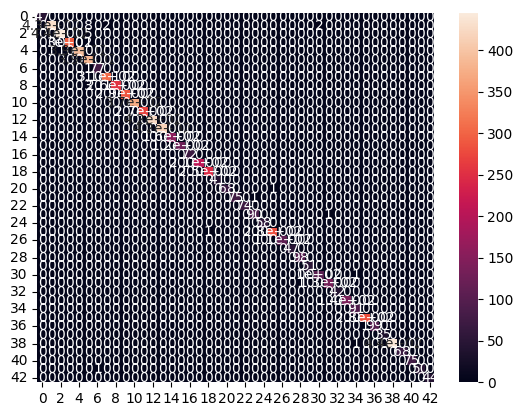

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, np.argmax(pred, axis=1)), annot=True);

In [37]:
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      0.97      0.99       442
           2       1.00      0.99      0.99       450
           3       1.00      1.00      1.00       298
           4       1.00      0.99      1.00       395
           5       0.95      1.00      0.98       386
           6       0.99      0.99      0.99        78
           7       0.99      0.99      0.99       310
           8       1.00      0.98      0.99       259
           9       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       373
          11       1.00      1.00      1.00       270
          12       1.00      1.00      1.00       425
          13       1.00      1.00      1.00       416
          14       1.00      1.00      1.00       155
          15       1.00      1.00      1.00       124
          16       1.00      1.00      1.00        72
          17       1.00    

In [38]:
model.save('capstone_project.h5')

In [39]:
image_test=cv2.imread('./Day 14 Students files/German Traffic Sign/Test/00001.png')
image_test.shape

(45, 42, 3)

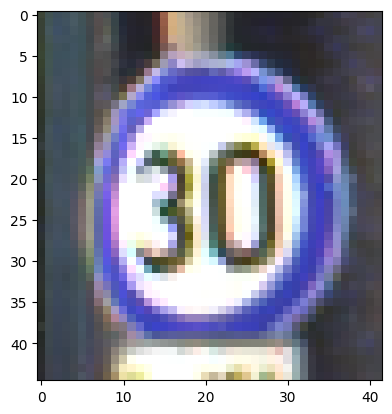

In [40]:
plt.imshow(image_test)

In [41]:
image_test=cv2.resize(image_test, (size,size))
image_test=image_test/255.0

In [42]:
image_test=np.array(image_test)

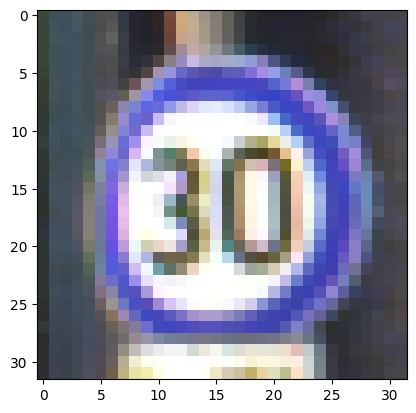

In [43]:
plt.imshow(image_test)

In [44]:
image_test=np.expand_dims(image_test, axis=0)

In [45]:
guess=model.predict(image_test)
np.argmax(guess)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


1